<a href="https://colab.research.google.com/github/Kimjihee05/mining/blob/main/%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84_%EB%B6%84%EB%A5%98_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8_%EA%B9%80%EC%A7%80%ED%9D%AC_2015352.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import mglearn

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt

In [15]:
# csv 데이터 가져오기, id를 인덱스로 지정
import pandas as pd

# .csv 데이터 가져오기
health_sample = pd.read_csv("/content/drive/My Drive/Colab Notebooks/health_data.csv",index_col='가입자일련번호')

print(health.columns)
display(health.info())      # 569행의 데이터 - id는 index이므로 생략됨, diagnosis와 30개 변수 (결측치 없음)  
display(health.head())

Index(['기준년도', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   시도코드         10000 non-null  int64  
 2   성별코드         10000 non-null  object 
 3   연령대코드(5세단위)  10000 non-null  int64  
 4   신장(5Cm단위)    10000 non-null  int64  
 5   체중(5Kg 단위)   10000 non-null  int64  
 6   허리둘레         10000 non-null  float64
 7   시력(좌)        10000 non-null  float64
 8   시력(우)        10000 non-null  float64
 9   청력(좌)        10000 non-null  int64  
 10  청력(우)        10000

None

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
2,2020,27,F,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
3,2020,11,F,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
5,2020,41,F,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [16]:
health_sample= health_sample.loc[:, ['성별코드','수축기혈압','이완기혈압','식전혈당(공복혈당)','총콜레스테롤','트리글리세라이드','HDL콜레스테롤','LDL콜레스테롤','혈색소','요단백','혈청크레아티닌','(혈청지오티)AST','(혈청지오티)ALT','감마지티피','음주여부','치석']]
health_sample.head(10)

,성별코드,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,음주여부,치석
가입자일련번호,,,,,,,,,,,,,,,,
1,M,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,No,NaN
2,F,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,No,NaN
3,F,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,No,NaN
4,M,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,No,0.0
5,F,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,No,NaN
6,M,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.0,1.1,25.0,32.0,26.0,Yes,NaN
7,M,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,Yes,1.0
8,M,131.0,79.0,93.0,NaN,NaN,NaN,NaN,15.9,1.0,1.2,18.0,17.0,19.0,No,2.0
9,F,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,1.0,0.7,42.0,48.0,39.0,No,NaN


In [17]:
print(health_sample.columns)
display(health_sample.info())      # 569행의 데이터 - id는 index이므로 생략됨, diagnosis와 30개 변수 (결측치 없음)  
display(health_sample.head())

Index(['성별코드', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
       'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST',
       '(혈청지오티)ALT', '감마지티피', '음주여부', '치석'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   성별코드        10000 non-null  object 
 1   수축기혈압       9912 non-null   float64
 2   이완기혈압       9912 non-null   float64
 3   식전혈당(공복혈당)  9912 non-null   float64
 4   총콜레스테롤      4044 non-null   float64
 5   트리글리세라이드    4044 non-null   float64
 6   HDL콜레스테롤    4044 non-null   float64
 7   LDL콜레스테롤    3977 non-null   float64
 8   혈색소         9912 non-null   float64
 9   요단백         9861 non-null   float64
 10  혈청크레아티닌     9912 non-null   float64
 11  (혈청지오티)AST  9912 non-null   float64
 12  (혈청지오티)ALT  9912 non-null   float64
 13  감마지티피       9912 non-null   float64
 14  음주여부        9999 non-nul

None

,성별코드,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,음주여부,치석
가입자일련번호,,,,,,,,,,,,,,,,
1,M,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,No,NaN
2,F,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,No,NaN
3,F,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,No,NaN
4,M,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,No,0.0
5,F,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,No,NaN


In [18]:
health_sample.isnull()

,성별코드,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,음주여부,치석
가입자일련번호,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,True
4,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,True
9997,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False
9998,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,True


In [19]:
health_sample.isnull().sum()

성별코드             0
수축기혈압           88
이완기혈압           88
식전혈당(공복혈당)      88
총콜레스테롤        5956
트리글리세라이드      5956
HDL콜레스테롤      5956
LDL콜레스테롤      6023
혈색소             88
요단백            139
혈청크레아티닌         88
(혈청지오티)AST      88
(혈청지오티)ALT      88
감마지티피           88
음주여부             1
치석            6749
dtype: int64

In [20]:
health_sample = health_sample.fillna(0)

In [21]:
print(health_sample.columns)
display(health_sample.info())      # 569행의 데이터 - id는 index이므로 생략됨, diagnosis와 30개 변수 (결측치 없음)  
display(health_sample.head())

Index(['성별코드', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
       'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST',
       '(혈청지오티)ALT', '감마지티피', '음주여부', '치석'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   성별코드        10000 non-null  object 
 1   수축기혈압       10000 non-null  float64
 2   이완기혈압       10000 non-null  float64
 3   식전혈당(공복혈당)  10000 non-null  float64
 4   총콜레스테롤      10000 non-null  float64
 5   트리글리세라이드    10000 non-null  float64
 6   HDL콜레스테롤    10000 non-null  float64
 7   LDL콜레스테롤    10000 non-null  float64
 8   혈색소         10000 non-null  float64
 9   요단백         10000 non-null  float64
 10  혈청크레아티닌     10000 non-null  float64
 11  (혈청지오티)AST  10000 non-null  float64
 12  (혈청지오티)ALT  10000 non-null  float64
 13  감마지티피       10000 non-null  float64
 14  음주여부        10000 non-nu

None

,성별코드,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,음주여부,치석
가입자일련번호,,,,,,,,,,,,,,,,
1,M,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,No,0.0
2,F,110.0,73.0,87.0,0.0,0.0,0.0,0.0,12.7,1.0,0.5,18.0,15.0,15.0,No,0.0
3,F,123.0,80.0,102.0,0.0,0.0,0.0,0.0,12.8,1.0,0.7,27.0,25.0,7.0,No,0.0
4,M,134.0,84.0,146.0,0.0,0.0,0.0,0.0,16.4,1.0,1.2,65.0,97.0,72.0,No,0.0
5,F,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,No,0.0


In [22]:
health_sample = health_sample.replace({'M':0, 'F':1,})

In [23]:
health_sample = health_sample.replace({'No':0, 'Yes':1,})

In [24]:
print(health_sample.columns)
display(health_sample.info())      # 569행의 데이터 - id는 index이므로 생략됨, diagnosis와 30개 변수 (결측치 없음)  
display(health_sample.head())

Index(['성별코드', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
       'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST',
       '(혈청지오티)ALT', '감마지티피', '음주여부', '치석'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   성별코드        10000 non-null  int64  
 1   수축기혈압       10000 non-null  float64
 2   이완기혈압       10000 non-null  float64
 3   식전혈당(공복혈당)  10000 non-null  float64
 4   총콜레스테롤      10000 non-null  float64
 5   트리글리세라이드    10000 non-null  float64
 6   HDL콜레스테롤    10000 non-null  float64
 7   LDL콜레스테롤    10000 non-null  float64
 8   혈색소         10000 non-null  float64
 9   요단백         10000 non-null  float64
 10  혈청크레아티닌     10000 non-null  float64
 11  (혈청지오티)AST  10000 non-null  float64
 12  (혈청지오티)ALT  10000 non-null  float64
 13  감마지티피       10000 non-null  float64
 14  음주여부        10000 non-nu

None

,성별코드,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,음주여부,치석
가입자일련번호,,,,,,,,,,,,,,,,
1,0,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,0,0.0
2,1,110.0,73.0,87.0,0.0,0.0,0.0,0.0,12.7,1.0,0.5,18.0,15.0,15.0,0,0.0
3,1,123.0,80.0,102.0,0.0,0.0,0.0,0.0,12.8,1.0,0.7,27.0,25.0,7.0,0,0.0
4,0,134.0,84.0,146.0,0.0,0.0,0.0,0.0,16.4,1.0,1.2,65.0,97.0,72.0,0,0.0
5,1,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,0,0.0


In [25]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [26]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

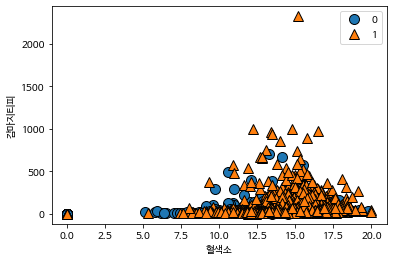

In [27]:
mglearn.discrete_scatter(health_sample['혈색소'], health_sample['감마지티피'], health_sample['음주여부'])
plt.xlabel("혈색소")
plt.ylabel("감마지티피")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


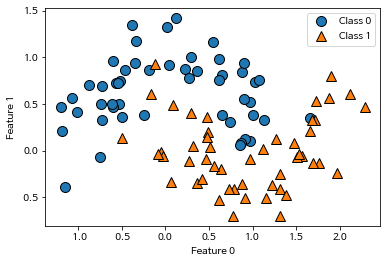

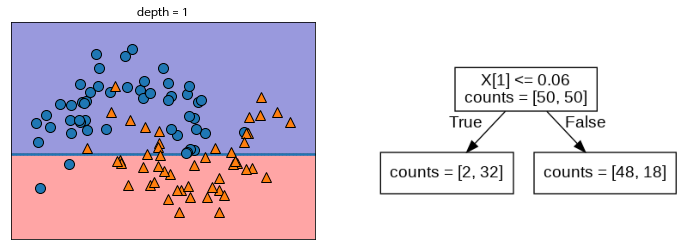

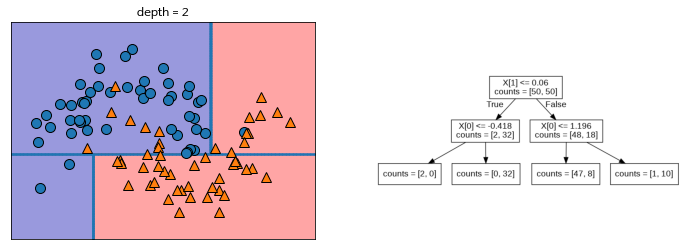

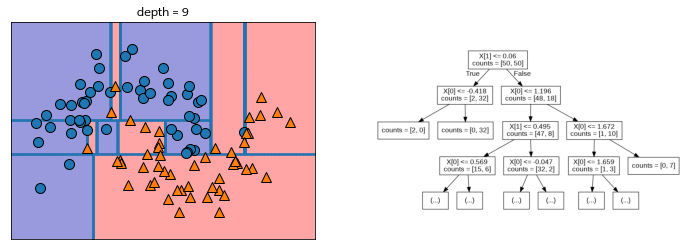

In [28]:
# 의사결정나무 만드는 과정 
mglearn.plots.plot_tree_progressive()

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = health_sample.iloc[:, 1:]  # 30개 변수 
#y = health_sample.iloc[:, 0]   # target 변수 diagnosis  
y = health_sample['성별코드']



# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.997
시험용 데이터 정확도: 0.814


In [30]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.866
시험용 데이터 정확도: 0.850


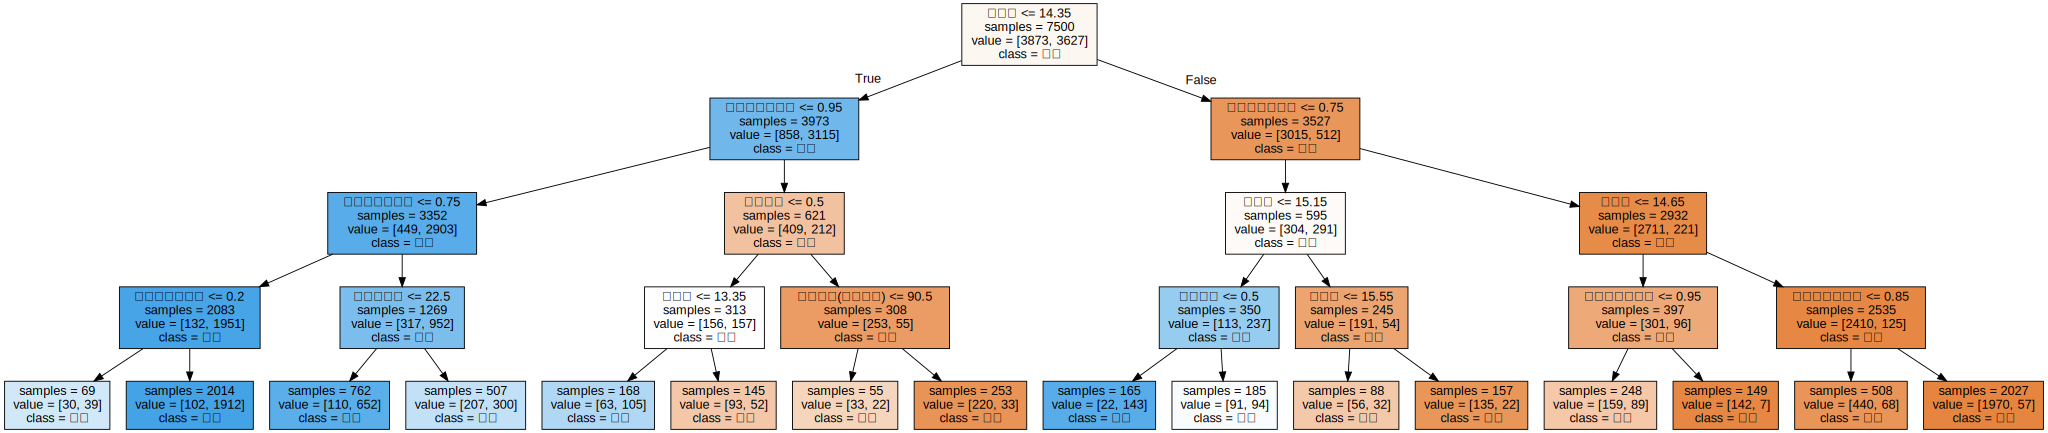

In [31]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "양성", "악성"],
                feature_names=health_sample.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [32]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.         0.0028663  0.         0.         0.
 0.         0.71045652 0.         0.24422929 0.         0.
 0.01851528 0.02393262 0.        ]


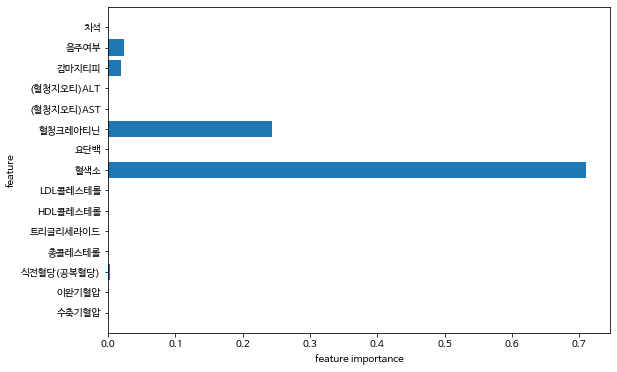

In [33]:
import numpy as np

def plot_feature_importances_wisc(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health_sample.columns[1:])  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health_sample.columns[1:])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_wisc(tree)